In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("../data/Sample_Data.csv")




In [4]:
df.head()



,Values,Timestamp
0,100,26-06-2024 06:17:55
1,100,26-06-2024 06:18:11
2,100,26-06-2024 06:18:28
3,100,26-06-2024 06:18:45
4,100,26-06-2024 06:19:00


#No cleaning is needed here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21919 entries, 0 to 21918
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Values     21919 non-null  int64 
 1   Timestamp  21919 non-null  object
dtypes: int64(1), object(1)
memory usage: 342.6+ KB


Timestamp format: DD-MM-YYYY HH:MM:SS (24-hour clock, no AM/PM).



In [6]:
print(df['Timestamp'].head(20))


0     26-06-2024 06:17:55
1     26-06-2024 06:18:11
2     26-06-2024 06:18:28
3     26-06-2024 06:18:45
4     26-06-2024 06:19:00
5     26-06-2024 06:19:16
6     26-06-2024 09:29:05
7     26-06-2024 09:29:21
8     26-06-2024 09:29:37
9     26-06-2024 09:29:53
10    26-06-2024 09:29:56
11    26-06-2024 09:30:11
12    26-06-2024 09:30:27
13    26-06-2024 09:30:45
14    26-06-2024 09:31:01
15    26-06-2024 09:31:17
16    26-06-2024 09:31:34
17    26-06-2024 09:31:50
18    26-06-2024 09:32:06
19    26-06-2024 09:32:22
Name: Timestamp, dtype: object


In [7]:
df["Timestamp"].str[11:13].astype(int).max()


np.int64(23)

convert timestamp to datetime & sort

In [8]:
df["timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)


In [9]:
df["timestamp"].dtype


dtype('<M8[ns]')

In [10]:
df = df.sort_values("timestamp").reset_index(drop=True)


In [11]:
df[["timestamp"]].head()


,timestamp
0,2024-06-26 06:17:55
1,2024-06-26 06:18:11
2,2024-06-26 06:18:28
3,2024-06-26 06:18:45
4,2024-06-26 06:19:00


a) same plot as excel

In [12]:
df["ma_1000"] = df["Values"].rolling(window=1000).mean()
df["ma_5000"] = df["Values"].rolling(window=5000).mean()

print (df)


       Values            Timestamp           timestamp  ma_1000  ma_5000
0         100  26-06-2024 06:17:55 2024-06-26 06:17:55      NaN      NaN
1         100  26-06-2024 06:18:11 2024-06-26 06:18:11      NaN      NaN
2         100  26-06-2024 06:18:28 2024-06-26 06:18:28      NaN      NaN
3         100  26-06-2024 06:18:45 2024-06-26 06:18:45      NaN      NaN
4         100  26-06-2024 06:19:00 2024-06-26 06:19:00      NaN      NaN
...       ...                  ...                 ...      ...      ...
21914      92  03-07-2024 10:29:38 2024-07-03 10:29:38   64.473  64.9504
21915      92  03-07-2024 10:29:54 2024-07-03 10:29:54   64.487  64.9548
21916      92  03-07-2024 10:30:11 2024-07-03 10:30:11   64.501  64.9592
21917      92  03-07-2024 10:30:26 2024-07-03 10:30:26   64.515  64.9636
21918      92  03-07-2024 10:30:42 2024-07-03 10:30:42   64.529  64.9680

[21919 rows x 5 columns]


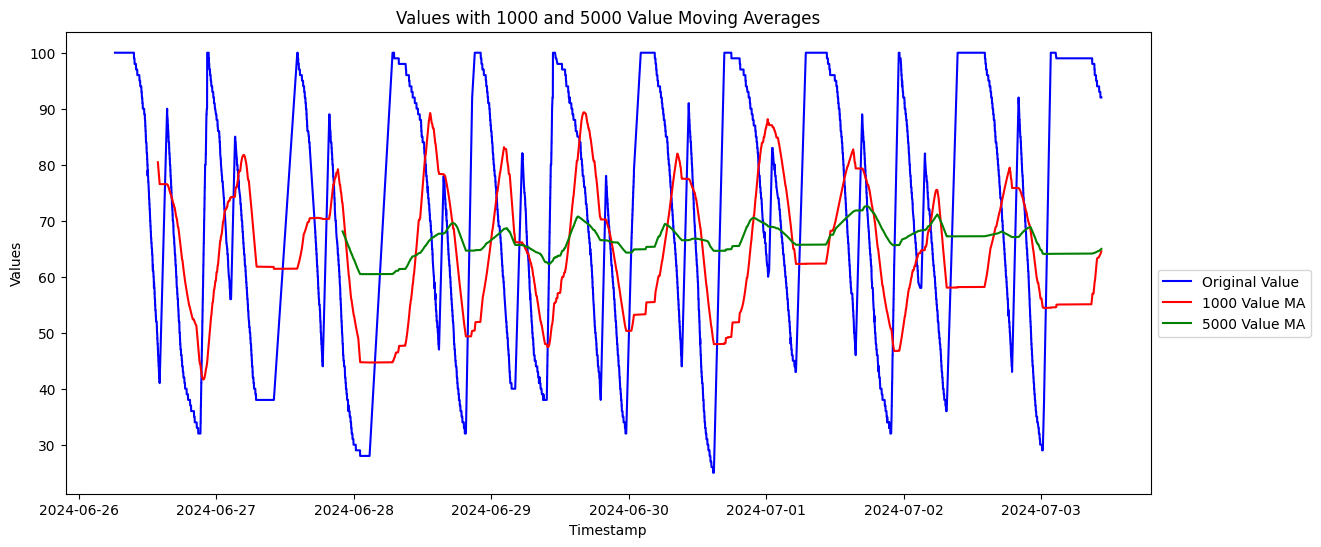

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(df["timestamp"], df["Values"], label="Original Value" ,color="blue")

plt.plot(df["timestamp"], df["ma_1000"], label="1000 Value MA" ,color='red')
plt.plot(df["timestamp"], df["ma_5000"], label="5000 Value MA" ,color="green")

plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Values with 1000 and 5000 Value Moving Averages")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))

plt.show()



b) 5 day moving average plot

In [26]:
df['daily_ma_5'] = df['Values'].rolling(window=5).mean()
df.to_csv("Data.csv", index=False)

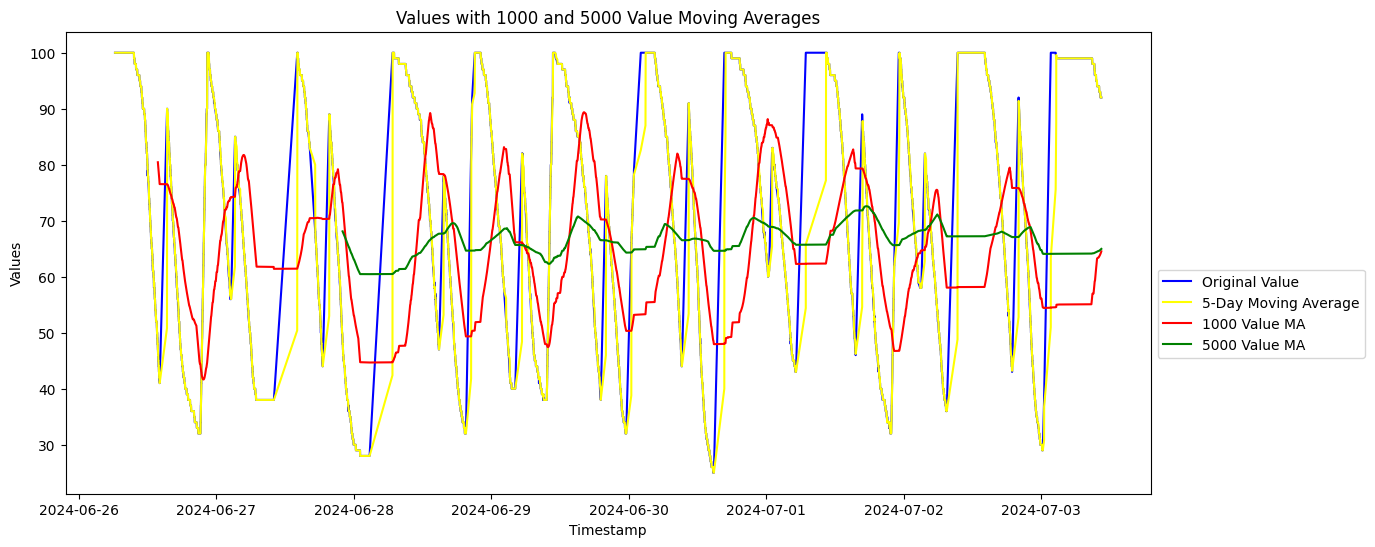

In [15]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(df["timestamp"], df["Values"], label="Original Value" ,color="blue")
plt.plot(df["timestamp"], df['daily_ma_5'], label="5-Day Moving Average", color='yellow')

plt.plot(df["timestamp"], df["ma_1000"], label="1000 Value MA" ,color='red')
plt.plot(df["timestamp"], df["ma_5000"], label="5000 Value MA" ,color="green")

plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Values with 1000 and 5000 Value Moving Averages")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))

plt.show()


c) finding peaks, and lows

In [16]:
df["prev_value"] = df["Values"].shift(1)
df["next_value"] = df["Values"].shift(-1)


In [17]:
peaks = df[
    (df["Values"] > df["prev_value"]) &
    (df["Values"] > df["next_value"])
]

print(peaks)

       Values            Timestamp           timestamp  ma_1000  ma_5000  \
557        83  26-06-2024 11:49:49 2024-06-26 11:49:49      NaN      NaN   
603        79  26-06-2024 12:01:22 2024-06-26 12:01:22      NaN      NaN   
798        62  26-06-2024 12:55:48 2024-06-26 12:55:48      NaN      NaN   
2866       85  27-06-2024 00:33:37 2024-06-27 00:33:37   65.266      NaN   
3198       77  27-06-2024 03:54:40 2024-06-27 03:54:40   78.602      NaN   
3412       62  27-06-2024 05:04:45 2024-06-27 05:04:45   80.973      NaN   
3677       43  27-06-2024 06:20:57 2024-06-27 06:20:57   69.631      NaN   
3811       39  27-06-2024 06:55:03 2024-06-27 06:55:03   63.044      NaN   
4153       93  27-06-2024 15:26:26 2024-06-27 15:26:26   68.019      NaN   
4256       87  27-06-2024 15:52:50 2024-06-27 15:52:50   69.519      NaN   
4783       74  27-06-2024 20:38:54 2024-06-27 20:38:54   77.359      NaN   
6308       89  28-06-2024 11:30:47 2024-06-28 11:30:47   70.320  64.2324   
6797       5

In [18]:
lows = df[
    (df["Values"] < df["prev_value"]) &
    (df["Values"] < df["next_value"])
]
print(lows)

       Values            Timestamp           timestamp  ma_1000  ma_5000  \
120        97  26-06-2024 09:57:38 2024-06-26 09:57:38      NaN      NaN   
360        92  26-06-2024 10:58:56 2024-06-26 10:58:56      NaN      NaN   
556        82  26-06-2024 11:49:32 2024-06-26 11:49:32      NaN      NaN   
602        78  26-06-2024 12:01:06 2024-06-26 12:01:06      NaN      NaN   
1593       42  26-06-2024 18:14:03 2024-06-26 18:14:03   61.595      NaN   
2865       84  27-06-2024 00:33:20 2024-06-27 00:33:20   65.218      NaN   
3197       76  27-06-2024 03:54:23 2024-06-27 03:54:23   78.557      NaN   
3411       61  27-06-2024 05:04:30 2024-06-27 05:04:30   80.991      NaN   
3438       59  27-06-2024 05:11:40 2024-06-27 05:11:40   80.418      NaN   
3676       42  27-06-2024 06:20:42 2024-06-27 06:20:42   69.681      NaN   
3810       38  27-06-2024 06:54:47 2024-06-27 06:54:47   63.091      NaN   
4255       86  27-06-2024 15:52:33 2024-06-27 15:52:33   69.503      NaN   
4782       7

In [19]:
peaks_table = peaks[["timestamp", "Values"]].copy()
peaks_table["type"] = "Peak"

lows_table = lows[["timestamp", "Values"]].copy()
lows_table["type"] = "Low"

peaks_lows_table = (
    pd.concat([peaks_table, lows_table])
    .sort_values("timestamp")
    .reset_index(drop=True)
)

peaks_lows_table


,timestamp,Values,type
0,2024-06-26 09:57:38,97,Low
1,2024-06-26 10:58:56,92,Low
2,2024-06-26 11:49:32,82,Low
3,2024-06-26 11:49:49,83,Peak
4,2024-06-26 12:01:06,78,Low
...,...,...,...
94,2024-07-02 23:18:04,34,Low
95,2024-07-02 23:18:22,35,Peak
96,2024-07-02 23:48:57,30,Low
97,2024-07-03 00:09:09,29,Low


d)Find out every instance the Voltage went below 20 and tabulate it

In [20]:
below_20 = df[df["Values"] < 20]


In [21]:
below_20_table = below_20[["timestamp", "Values"]]
below_20_table


,timestamp,Values


e)Find every instance where the downward slope accelerates in each downward cycle and print the timestamp

In [22]:
df["dV"]=df["Values"].diff()

In [23]:
df["d2V"] = df["dV"].diff()


In [24]:
accelerated_downward = df[
    (df["dV"] < 0) & (df["d2V"] < 0)
][["timestamp", "Values"]]


In [25]:
accelerated_downward


,timestamp,Values
36,2024-06-26 09:36:30,99
60,2024-06-26 09:42:33,98
120,2024-06-26 09:57:38,97
125,2024-06-26 09:58:47,97
174,2024-06-26 10:11:06,96
...,...,...
21687,2024-07-03 09:21:12,96
21732,2024-07-03 09:34:56,95
21769,2024-07-03 09:44:50,94
21831,2024-07-03 10:07:38,93
